# Projeto Final Algoritmos Genéticos: Otimização de vidros a prova de bala

#### Trio: csv_Computeiros_sinápticos_virtuais 

#### Integrantes: Diogo Pereira de Lima Carvalho, José David Sales e Mayllon Emmanoel Pequeno

## Entendendo o SciGlass

<p style="text-align: justify"> A base de dados utilizada nesse trabalho é o SciGlass <sup>[1]</sup>, o SciGlass é um banco de dados abrangente de propriedades de vidros, projetado para auxiliar na pesquisa e desenvolvimento de novos tipos de vidros. A database SciGlass 7.7 possui dados de mais de 300 mil composições, incluindo óxidos, halogenetos e calcogenetos. Para acesarmo essa grande base de dados, utilizamos o módulo GlassPy <sup>[2]</sup> como intermediador. Glasspy é um módulo em python também voltado a pesquisas relacionadas a materiais vítreos. O glasspy oferece um método conveniente para carregar dados do SciGlass em um dataframe do tipo Pandas. O GlassPy também abarca o GlassNet <sup>[3]</sup>, que é um modelo preditivo para várias propriedades de vidros.</p>

In [2]:
import glasspy.data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
source = glasspy.data.SciGlass()
df = source.data
display(df)

elements                                                         \
                     H   Li   Be         B    C    N         O    F        Na   
ID                                                                              
20400020000        0.0  0.0  0.0  0.000000  0.0  0.0  0.666667  0.0  0.000000   
20500020001        0.0  0.0  0.0  0.000000  0.0  0.0  0.579213  0.0  0.196815   
20500020002        0.0  0.0  0.0  0.000000  0.0  0.0  0.580869  0.0  0.193449   
20500020003        0.0  0.0  0.0  0.000000  0.0  0.0  0.581986  0.0  0.187167   
20500020004        0.0  0.0  0.0  0.000000  0.0  0.0  0.583672  0.0  0.183080   
...                ...  ...  ...       ...  ...  ...       ...  ...       ...   
4493300611694      0.0  0.0  0.0  0.000000  0.0  0.0  0.625485  0.0  0.000000   
4493300611695      0.0  0.0  0.0  0.001948  0.0  0.0  0.637540  0.0  0.000000   
4493300611696      0.0  0.0  0.0  0.000000  0.0  0.0  0.635921  0.0  0.000000   
4493300611697      0.0  0.0  0.0  0.014544  0.0  0.0  0.622226  0.0  0.035890   
4493300611698      0.0  0.0  0.0  0.041532  0.0  0.0  0.634462  0.0  0.000000   

                         ...              property                      \
                     Mg  ... SurfaceTensionAboveTg SurfaceTension1173K   
ID                       ...                                             
20400020000    0.000000  ...                   NaN                 NaN   
20500020001    0.000000  ...                   NaN                 NaN   
20500020002    0.000000  ...                   NaN                 NaN   
20500020003    0.000000  ...                   NaN                 NaN   
20500020004    0.000000  ...                   NaN                 NaN   
...                 ...  ...                   ...                 ...   
4493300611694  0.049125  ...                   NaN                 NaN   
4493300611695  0.009932  ...                   NaN                 NaN   
4493300611696  0.000000  ...                   NaN                 NaN   
4493300611697  0.000000  ...                   NaN                 NaN   
4493300611698  0.000487  ...                   NaN                 NaN   

                                                                           \
              SurfaceTension1473K SurfaceTension1573K SurfaceTension1673K   
ID                                                                          
20400020000                   NaN                 NaN                 NaN   
20500020001                   NaN                 NaN                 NaN   
20500020002                   NaN                 NaN                 NaN   
20500020003                   NaN                 NaN                 NaN   
20500020004                   NaN                 NaN                 NaN   
...                           ...                 ...                 ...   
4493300611694                 NaN                 NaN                 NaN   
4493300611695                 NaN                 NaN                 NaN   
4493300611696                 NaN                 NaN                 NaN   
4493300611697                 NaN                 NaN                 NaN   
4493300611698                 NaN                 NaN                 NaN   

                      metadata                                        \
              ChemicalAnalysis           Author  Year NumberElements   
ID                                                                     
20400020000              False  Volarovich M.P.  1936              2   
20500020001              False         Hoj J.W.  1992              5   
20500020002              False         Hoj J.W.  1992              5   
20500020003              False         Hoj J.W.  1992              5   
20500020004              False         Hoj J.W.  1992              5   
...                        ...              ...   ...            ...   
4493300611694            False        Murata T.  2019              7   
4493300611695            False        Murat

In [4]:
print(df.columns.levels[0])

Index(['elements', 'compounds', 'property', 'metadata'], dtype='object')


Para uma melhor mobilidade de trabalho, iremos dividir o dataset principal de acordo com as levels acima

In [5]:
df_elements = df["elements"]
df_compounds = df["compounds"]
df_property = df["property"]
df_metadata = df["metadata"]

In [6]:
print(f"Números de elementos: {len(df['elements'].columns)}")
display(df['elements'].columns)

Números de elementos: 76


Index(['H', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Na', 'Mg', 'Al', 'Si', 'P',
       'S', 'Cl', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni',
       'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Rb', 'Sr', 'Y', 'Zr', 'Nb',
       'Mo', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Cs',
       'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er',
       'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Pt', 'Au', 'Hg', 'Tl', 'Pb',
       'Bi', 'Th', 'U'],
      dtype='object')

In [7]:
df_elements.describe()

,H,Li,Be,B,C,N,O,F,Na,Mg,...,W,Re,Pt,Au,Hg,Tl,Pb,Bi,Th,U
count,283102.000000,283102.000000,283102.000000,283102.000000,283102.000000,283102.000000,283102.000000,283102.000000,283102.000000,283102.000000,...,283102.000000,2.831020e+05,2.831020e+05,283102.000000,283102.000000,283102.000000,283102.000000,283102.000000,283102.000000,283102.000000
mean,0.000380,0.015008,0.001372,0.052757,0.000027,0.000429,0.503980,0.036907,0.028851,0.005999,...,0.001216,3.841373e-09,5.265709e-09,0.000001,0.000196,0.002419,0.011524,0.006479,0.000248,0.000041
std,0.007751,0.048231,0.016909,0.096186,0.001557,0.007426,0.218663,0.141839,0.057304,0.019863,...,0.010660,1.886971e-06,7.700550e-07,0.000257,0.005864,0.027854,0.043662,0.035569,0.004296,0.001935
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.545455,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.593220,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.062807,0.000000,0.000000,0.617995,0.000000,0.034915,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.558600,0.666667,0.500000,0.401123,0.366643,0.438100,0.750000,0.833333,0.666667,0.500000,...,0.250000,1.000205e-03,1.482233e-04,0.100000,0.500000,1.000000,1.000000,1.000000,0.333333,0.333333


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283102 entries, 20400020000 to 4493300611698
Columns: 793 entries, ('elements', 'H') to ('metadata', 'NumberCompounds')
dtypes: Int64(3), boolean(1), float64(788), string(1)
memory usage: 1.7 GB


In [9]:
print(f"Números de compostos: {len(df['compounds'].columns)}")
print(list(df['compounds'].columns))

Números de compostos: 625
['SiO2', 'P2O5', 'ZrO2', 'Na2O', 'Al2O3', 'Fe2O3', 'CaO', 'MgO', 'K2O', 'MnO', 'GeO2', 'Li2O', 'Ta2O5', 'ZnO', 'SrO', 'CdO', 'SnO2', 'B2O3', 'La2O3', 'Ga2O3', 'Y2O3', 'TiO2', 'Nb2O5', 'PbO', 'HfO2', 'WO3', 'Sb2O3', 'Bi2O3', 'CdCl2', 'KCl', 'BaCl2', 'CsCl', 'TlCl', 'CaCl2', 'CdI2', 'CsI', 'BaI2', 'PbI2', 'CdBr2', 'KBr', 'CsBr', 'BaBr2', 'CdF2', 'NaCl', 'BaF2', 'PbF2', 'PbCl2', 'NaF', 'InF3', 'GaF3', 'ZnF2', 'LaF3', 'YF3', 'BaO', 'Cr2O3', 'AlF3', 'SiF4', 'Cu2O', 'CaF2', 'BeO', 'CuO', 'Nd2O3', 'CeO2', 'Cs2O', 'As2O3', 'SO3', 'F', 'NH4NO3', 'MgF2', 'SrF2', 'Rb2O', 'Pd', 'Rh', 'Ru', 'MoO3', 'FeO', 'PbBr2', 'Mn2O3', 'KF', 'SO2', 'ThO2', 'Ag2O', 'Ag2S', 'Fe', 'Mo', 'TeO2', 'Tl2O', 'CoO', 'In2O3', 'Sc2O3', 'ZrF4', 'ThF4', 'HfF4', 'F2', 'NiO', 'ErF3', 'V2O5', 'Li2SO4', 'As2O5', 'Cl', 'MnO2', 'OH', 'Sm2O3', 'Gd2O3', 'Tb2O3', 'Dy2O3', 'Ho2O3', 'Er2O3', 'Yb2O3', 'LiF', 'BF3', 'AlN', 'Co3O4', 'Fe3O4', 'ZnCl2', 'H2O', 'SnO', 'Mn3O4', 'Ce2O3', 'Pr2O3', 'CrO3', 'KHF2', 'ScF3'

In [10]:
df_compounds.describe()

,SiO2,P2O5,ZrO2,Na2O,Al2O3,Fe2O3,CaO,MgO,K2O,MnO,...,UF2,Ba(H2PO4)2,AlPO4,AgGaS2,AgAsS2,MgS,Na2B4O7,CaCO3,AsTe3,Re2O7
count,283102.000000,283102.000000,283102.000000,283102.000000,283102.000000,283102.000000,283102.000000,283102.000000,283102.000000,283102.000000,...,2.831020e+05,2.831020e+05,283102.000000,283102.000000,283102.000000,283102.000000,283102.000000,2.831020e+05,283102.000000,2.831020e+05
mean,0.257937,0.055766,0.003943,0.044360,0.029890,0.003170,0.039280,0.016951,0.016589,0.002017,...,1.801291e-08,4.196787e-07,0.000002,0.000023,0.000023,0.000014,0.000003,2.825837e-07,0.000010,4.944423e-10
std,0.302782,0.150791,0.024856,0.093117,0.067785,0.027082,0.101861,0.057141,0.058738,0.026057,...,9.584187e-06,2.232998e-04,0.000546,0.004098,0.004098,0.002863,0.001691,1.503552e-04,0.001851,2.630795e-07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
75%,0.580000,0.000000,0.000000,0.045995,0.027200,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.099490e-03,1.188119e-01,0.214300,1.000000,1.000000,0.700000,0.900000,8.000000e-02,0.400000,1.399776e-04


In [11]:
display(df['property'].columns)

Index(['T0', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10',
       'T11', 'T12', 'Viscosity773K', 'Viscosity873K', 'Viscosity973K',
       'Viscosity1073K', 'Viscosity1173K', 'Viscosity1273K', 'Viscosity1373K',
       'Viscosity1473K', 'Viscosity1573K', 'Viscosity1673K', 'Viscosity1773K',
       'Viscosity1873K', 'Viscosity2073K', 'Viscosity2273K', 'Viscosity2473K',
       'Tg', 'Tmelt', 'Tliquidus', 'TLittletons', 'TAnnealing', 'Tstrain',
       'Tsoft', 'TdilatometricSoftening', 'AbbeNum', 'RefractiveIndex',
       'RefractiveIndexLow', 'RefractiveIndexHigh', 'MeanDispersion',
       'Permittivity', 'TangentOfLossAngle', 'TresistivityIs1MOhm.m',
       'Resistivity273K', 'Resistivity373K', 'Resistivity423K',
       'Resistivity573K', 'Resistivity1073K', 'Resistivity1273K',
       'Resistivity1473K', 'Resistivity1673K', 'YoungModulus', 'ShearModulus',
       'Microhardness', 'PoissonRatio', 'Density293K', 'Density1073K',
       'Density1273K', 'Density1473K', 'Density167

In [12]:
df_property.describe()

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,NucleationRate,TMaxGrowthVelocity,MaxGrowthVelocity,CrystallizationPeak,CrystallizationOnset,SurfaceTensionAboveTg,SurfaceTension1173K,SurfaceTension1473K,SurfaceTension1573K,SurfaceTension1673K
count,1693.000000,8128.000000,16444.000000,14857.000000,8306.000000,6121.000000,5373.000000,5640.000000,5924.000000,6437.000000,...,1.430000e+02,841.00000,8.430000e+02,24120.000000,13707.000000,4102.000000,783.000000,963.000000,1333.000000,835.000000
mean,1512.933565,1620.645442,1538.043047,1380.677945,1245.229570,1069.464741,975.365127,911.543647,873.216450,847.229239,...,1.214917e+13,1208.92654,-1.617119e-04,822.082007,777.731105,0.402489,0.179604,0.225280,0.275910,0.367661
std,329.429691,276.905450,221.489910,233.035829,246.772153,249.204534,246.173380,223.494991,209.682164,200.377929,...,8.101728e+13,165.71100,2.504463e-03,265.059143,220.975943,3.912533,0.069703,0.081622,0.104534,0.104944
min,411.510901,373.150000,390.786536,358.097922,344.152480,333.120036,325.044104,317.363291,310.049292,303.076441,...,-1.218500e+05,592.15000,-4.278200e-02,263.150000,297.150000,0.043902,0.061317,0.048256,0.085615,0.085099
25%,1288.335242,1497.887762,1452.150000,1278.410986,1134.322684,943.150000,844.039465,800.484320,780.255293,753.623999,...,3.650000e+06,1143.15000,9.316650e-09,622.150000,633.150000,0.213988,0.121270,0.167050,0.211500,0.295452
50%,1608.923315,1684.839087,1559.150000,1419.359839,1279.876837,1089.933813,1004.203406,940.490179,898.805792,867.298254,...,9.360000e+06,1198.15000,2.516700e-08,790.150000,738.150000,0.302626,0.179360,0.227021,0.279420,0.369200
75%,1727.219580,1807.937262,1703.086646,1558.150000,1432.552924,1235.273779,1134.518713,1032.988074,987.501089,957.853674,...,3.597550e+09,1268.15000,1.483300e-07,1022.150000,898.150000,0.415000,0.223370,0.289139,0.330000,0.440076
max,2615.090186,2500.150000,2500.150000,2658.848730,4462.844336,2288.592139,2114.915015,1981.440649,1883.154883,1821.396948,...,6.805600e+14,1950.15000,2.950000e-03,1632.150000,1813.150000,193.200000,0.424983,0.694040,0.737592,0.781145


Sabendo que nossas propriedades de interesse são "Microhardness" e "Young's Modulus", podemos dar um enfoque maior nessas colunas e dropar as linhas onde as mesmas possuem valores não preenchidos (NaN)

In [13]:
df_property["Microhardness"].describe()

count    15859.000000
mean         4.297319
std          8.062285
min          0.002400
25%          1.912000
50%          4.120000
75%          5.876000
max        502.700012
Name: Microhardness, dtype: float64

In [14]:
df_property["YoungModulus"].describe()

count    16801.000000
mean        74.004610
std         25.818854
min          1.620000
25%         61.400002
50%         74.500000
75%         85.699997
max        500.000000
Name: YoungModulus, dtype: float64

In [15]:
num_nan_microhardness = df_property['Microhardness'].isna().sum()
num_nan_young = df_property['YoungModulus'].isna().sum()

num_nan_microhardness

print(f"Porcentagem de valores NaN na coluna de dureza {num_nan_microhardness/len(df_property['Microhardness'])}")
print(f"Porcentagem de valores NaN na coluna de Módulo de Young {num_nan_young/len(df_property['YoungModulus'])}")

Porcentagem de valores NaN na coluna de dureza 0.9439813212199136
Porcentagem de valores NaN na coluna de Módulo de Young 0.9406538985948527


In [16]:
len(df_property['Microhardness']) - num_nan_microhardness

15859

In [17]:
len(df_property['YoungModulus']) - num_nan_young

16801

<p style="text-align: justify"> Podemos fazer um plot da distribuição dos dados não nulos de cada coluna de interesse

C:\Users\jose23038\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


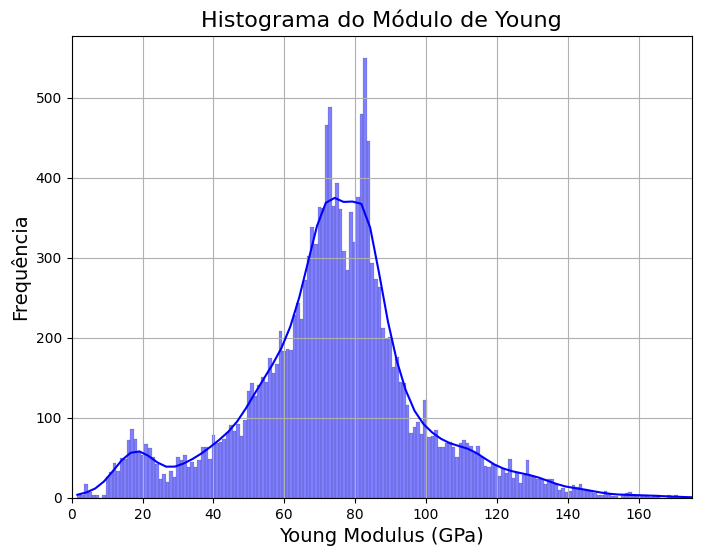

In [18]:
plt.figure(figsize=(8, 6))  # 
sns.histplot(df_property['YoungModulus'], bins=500, kde=True, color='blue', edgecolor='black')

plt.xlim(0, 175)

# Adicionar rótulos e título
plt.xlabel('Young Modulus (GPa)', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.title('Histograma do Módulo de Young', fontsize=16)

plt.grid(True)

plt.show()

C:\Users\jose23038\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


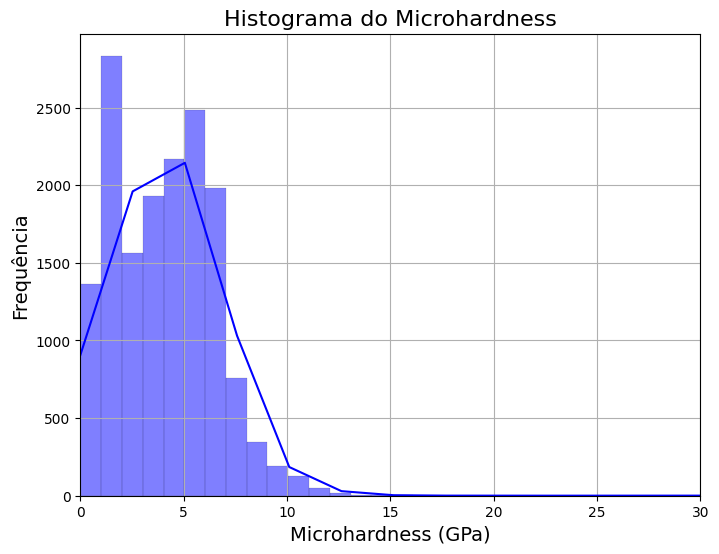

In [19]:
plt.figure(figsize=(8, 6))  # 
sns.histplot(df_property['Microhardness'], bins=500, kde=True, color='blue', edgecolor='black')

plt.xlim(0, 30)

# Adicionar rótulos e título
plt.xlabel('Microhardness (GPa)', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.title('Histograma do Microhardness', fontsize=16)

plt.grid(True)

plt.show()

In [20]:
display(df['metadata'].columns)

Index(['ChemicalAnalysis', 'Author', 'Year', 'NumberElements',
       'NumberCompounds'],
      dtype='object')

In [21]:
df["metadata"]["ChemicalAnalysis"].any()

True

In [22]:
display(f"Ano dos dados mais antigos: {min(df['metadata']['Year'])}")
display(f"Ano dos dados mais recentes: {max(df['metadata']['Year'])}")

'Ano dos dados mais antigos: 1882'

'Ano dos dados mais recentes: 2019'

## Entendendo o GlassNet

<p style="text-align: justify"> O GlassNet é uma rede neural multitask profunda treinada com mais 218 mil exemplos de diferentes composições vítreas. O modelo tem a capacidade de prever 85 diferentes propriedades, sejam elas óticas, elétricas, dielétricas, mecânicas e térmicas em diferentes tipos de composições. Abaixo, importamos o modelo do GlassNet através do Glasspy

In [23]:
import glasspy.predict
from glasspy.predict import GlassNet

In [24]:
model = GlassNet()
composition = 'CaO(SiO2)3'
predictions = model.predict(composition)
predictions

C:\Users\jose23038\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.2.0 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,Cp1673K,TMaxGrowthVelocity,MaxGrowthVelocity,CrystallizationPeak,CrystallizationOnset,SurfaceTensionAboveTg,SurfaceTension1173K,SurfaceTension1473K,SurfaceTension1573K,SurfaceTension1673K
0,1917.084666,1841.159698,1630.970799,1522.503823,1410.482068,1336.270822,1252.667936,1213.074572,1159.236018,1119.108899,...,1444.165301,1562.580511,-5.961214,1248.888709,1168.361763,0.370331,0.270748,0.325962,0.370749,0.300875


In [25]:
composition = {
    'SiO2': 3,
    'CaO': 1,
}
predictions = model.predict(composition)
predictions

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,Cp1673K,TMaxGrowthVelocity,MaxGrowthVelocity,CrystallizationPeak,CrystallizationOnset,SurfaceTensionAboveTg,SurfaceTension1173K,SurfaceTension1473K,SurfaceTension1573K,SurfaceTension1673K
0,1917.084666,1841.159698,1630.970799,1522.503823,1410.482068,1336.270822,1252.667936,1213.074572,1159.236018,1119.108899,...,1444.165301,1562.580511,-5.961214,1248.888709,1168.361763,0.370331,0.270748,0.325962,0.370749,0.300875


In [26]:
import pandas as pd

composition_list = [
    [1, 3, 0],
    [1, 3, 1],
    [1, 3, 2],
    [0, 3, 1],
    [0, 3],
]

df_composition = pd.DataFrame(composition_list, columns=['CaO', 'SiO2', 'B2O3'])
display(df_composition)
predictions = model.predict(df_composition)
predictions

,CaO,SiO2,B2O3
0,1,3,0.0
1,1,3,1.0
2,1,3,2.0
3,0,3,1.0
4,0,3,NaN


,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,Cp1673K,TMaxGrowthVelocity,MaxGrowthVelocity,CrystallizationPeak,CrystallizationOnset,SurfaceTensionAboveTg,SurfaceTension1173K,SurfaceTension1473K,SurfaceTension1573K,SurfaceTension1673K
0,1917.084403,1841.159571,1630.970673,1522.503823,1410.481981,1336.270822,1252.667936,1213.074572,1159.236018,1119.108981,...,1444.165226,1562.580364,-5.961214,1248.888545,1168.361583,0.370331,0.270748,0.325962,0.370749,0.300875
1,1380.014214,1681.528736,1486.645399,1378.753363,1297.987139,1237.945491,1156.328704,1117.679884,1081.058614,1051.189663,...,1630.839577,1411.065490,-6.740182,1108.900489,1025.477282,0.282000,0.248742,0.279576,0.291259,0.236042
2,1283.749104,1608.364149,1422.259785,1312.964252,1243.955830,1189.705893,1111.204876,1074.174419,1040.244310,1009.560883,...,1705.680978,1339.382107,-6.500989,1090.582058,1013.666514,0.251576,0.203542,0.243449,0.224968,0.187794
3,1842.609978,2065.314239,1816.768664,1682.679841,1463.267074,1331.567977,1153.351945,1083.467393,1032.203197,937.262687,...,1538.902289,1312.112766,-7.396576,1072.221521,945.388477,0.226691,0.121744,0.248375,0.193821,0.137533
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df['compounds'].columns[80:85]

Index(['ThO2', 'Ag2O', 'Ag2S', 'Fe', 'Mo'], dtype='object')

In [28]:

composition_list_2 = list(range(80)), [3] * 5 + [1] * 75

df_composition = pd.DataFrame(composition_list_2, columns=list(df['compounds'].columns)[:80])
display(df_composition)
predictions = model.predict(df_composition)
predictions

,SiO2,P2O5,ZrO2,Na2O,Al2O3,Fe2O3,CaO,MgO,K2O,MnO,...,Rb2O,Pd,Rh,Ru,MoO3,FeO,PbBr2,Mn2O3,KF,SO2
0,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
1,3,3,3,3,3,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,...,Cp1673K,TMaxGrowthVelocity,MaxGrowthVelocity,CrystallizationPeak,CrystallizationOnset,SurfaceTensionAboveTg,SurfaceTension1173K,SurfaceTension1473K,SurfaceTension1573K,SurfaceTension1673K
0,2022.272601,1485.061352,1249.966978,1145.670298,1119.992091,1061.007399,925.700827,878.957877,849.139363,862.271365,...,1231.298182,977.096655,-6.086344,886.262356,1226.734828,0.387244,0.319204,0.293206,0.302240,1.021723
1,1977.972520,1542.421913,1295.446265,1176.554087,1152.001831,1090.292190,953.418161,911.698792,879.413108,884.213075,...,1304.240901,1019.093414,-5.966898,885.137436,1219.107486,0.400745,0.320430,0.291517,0.312033,1.020010


In [29]:
(df[df['property']['Density293K'] > 10])['property']['Density293K']

ID
1670800417347      12.121799
1670800417348      10.559773
1670800164187      10.024057
2860000380817      12.985496
2860000380823      10.154449
3137400388071      10.300000
3528300424413      10.523768
3528400424441      11.532164
4330900602133      10.923828
4330900602136      11.096685
4412000605930    4122.000000
Name: Density293K, dtype: float64

In [30]:
colunas = df.columns



In [31]:
(df[df['property']['Density293K'] > 10])

elements                                                        \
                     H   Li   Be        B    C    N         O    F   Na   Mg   
ID                                                                             
1670800417347      0.0  0.0  0.0  0.00000  0.0  0.0  0.500000  0.0  0.0  0.0   
1670800417348      0.0  0.0  0.0  0.00000  0.0  0.0  0.465517  0.0  0.0  0.0   
1670800164187      0.0  0.0  0.0  0.00000  0.0  0.0  0.428571  0.0  0.0  0.0   
2860000380817      0.0  0.0  0.0  0.00000  0.0  0.0  0.500000  0.0  0.0  0.0   
2860000380823      0.0  0.0  0.0  0.00000  0.0  0.0  0.600000  0.0  0.0  0.0   
3137400388071      0.0  0.0  0.0  0.00000  0.0  0.0  0.500000  0.0  0.0  0.0   
3528300424413      0.0  0.0  0.0  0.39604  0.0  0.0  0.600000  0.0  0.0  0.0   
3528400424441      0.0  0.0  0.0  0.00000  0.0  0.0  0.666667  0.0  0.0  0.0   
4330900602133      0.0  0.0  0.0  0.00000  0.0  0.0  0.183673  0.0  0.0  0.0   
4330900602136      0.0  0.0  0.0  0.00000  0.0  0.0  0.118943  0.0  0.0  0.0   
4412000605930      0.0  0.0  0.0  0.17284  0.0  0.0  0.600000  0.0  0.0  0.0   

               ...              property                      \
               ... SurfaceTensionAboveTg SurfaceTension1173K   
ID             ...                                             
1670800417347  ...                   NaN                 NaN   
1670800417348  ...                   NaN                 NaN   
1670800164187  ...                   NaN                 NaN   
2860000380817  ...                   NaN                 NaN   
2860000380823  ...                   NaN                 NaN   
3137400388071  ...                   NaN                 NaN   
3528300424413  ...                   NaN                 NaN   
3528400424441  ...                   NaN                 NaN   
4330900602133  ...                   NaN                 NaN   
4330900602136  ...                   NaN                 NaN   
4412000605930  ...                   NaN                 NaN   

                                                                           \
              SurfaceTension1473K SurfaceTension1573K SurfaceTension1673K   
ID                                                                          
1670800417347                 NaN                 NaN                 NaN   
1670800417348                 NaN                 NaN                 NaN   
1670800164187                 NaN                 NaN                 NaN   
2860000380817                 NaN                 NaN                 NaN   
2860000380823                 NaN                 NaN                 NaN   
3137400388071                 NaN                 NaN                 NaN   
3528300424413                 NaN                 NaN                 NaN   
3528400424441                 NaN                 NaN                 NaN   
4330900602133                 NaN                 NaN                 NaN   
4330900602136                 NaN                 NaN                 NaN   
4412000605930                 NaN                 NaN                 NaN   

                      metadata                                      \
              ChemicalAnalysis         Author  Year NumberElements   
ID                                                                   
1670800417347            False  El-Damrawi G.  1999              3   
1670800417348            False  El-Damrawi G.  1999              4   
1670800164187            False  El-Damrawi G.  1999              4   
2860000380817            False  El-Damrawi G.  2000              3   
2860000380823            False  El-Damrawi G.  2000              3   
3137400388071            False       Ghosh A.  1995              3   
3528300424413            False      Stentz D.  2000              3   
3528400424441            False      Stentz D.  2000              2   
4330900602133            False     Yang Guang  2016              4   
4330900602136            False     Yang Guang  2016              5   
4412000

## Busca de preços

<p align: 'justify'><h5> Para conseguir fazer estimativas de preços para as composições de vidro, optamos por fazer uma planilha excel com as fórmulas de todos os compostos em uma coluna e outra com os preços em dolares por grama. </h5></p>

In [70]:
compounds_list = []
for compound in list(df['compounds'].columns):
   if 'O' in compound:
      compounds_list.append(compound)
      
df_prices_empty = pd.DataFrame()
df_prices_empty['Oxide Coumpounds'] = compounds_list
df_prices_empty['Price per gram(dolar/gram)'] = [None]*len(compounds_list)
#df_prices_empty.to_excel('Prices_with_no_filling.excel',index=False)

In [68]:
prices = pd.read_csv("Prices.csv", delimiter=",")
prices.head(5)

,Oxide Coumpounds,Price per gram(dolar/gram)
0,SiO2,0.0954
1,P2O5,0.0533
2,ZrO2,0.0592
3,Na2O,2.3200
4,Al2O3,0.0657


In [86]:
glassnet_with_same_compounds = df['compounds'][prices['Oxide Coumpounds'].tolist()]
lines = len(glassnet_with_same_compounds['Ag2CO3'])
all_prices_glassnet = []
for i in range(lines):
   print(f'{i} de {lines}',end='\r')
   if sum(glassnet_with_same_compounds.iloc[i]) ==1:
      all_prices_per_gram = np.array(prices['Price per gram(dolar/gram)'].tolist())
      value = sum(np.array(glassnet_with_same_compounds.iloc[i])*all_prices_per_gram)
      all_prices_glassnet.append(value)

C:\Users\jose23038\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

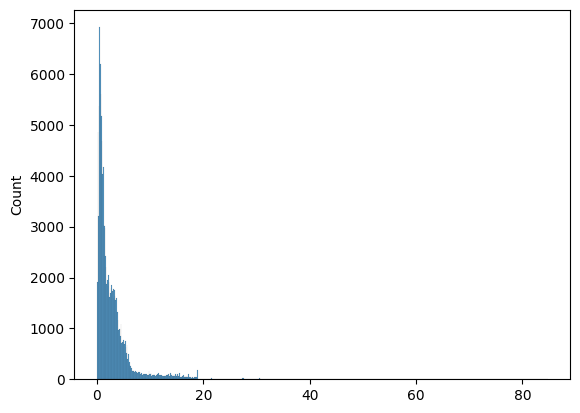

In [87]:
sns.histplot(all_prices_glassnet)

## Referências
[1] SciGlass. Disponível em: <https://www.akoscheminformatics.de/sciglass/sciglass.htm>. Acesso em: 25 maio. 2024.<br>
[2] GlassPy documentation — GlassPy latest documentation. Disponível em: <https://glasspy.readthedocs.io/en/latest/>. Acesso em: 22 maio. 2024. <br>
[3] CASSAR, D. R. GlassNet: A multitask deep neural network for predicting many glass properties. Ceramics international, v. 49, n. 22, p. 36013–36024, 1 nov. 2023.<br>